# 数据预处理

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import logging

root_logger = logging.getLogger()
if root_logger.hasHandlers():
    root_logger.handlers.clear()  # 或用 root_logger.handlers[:] = []

logging.basicConfig(
    level=logging.INFO,
    format='[%(asctime)s] %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    handlers=[
        logging.FileHandler("train_log.txt", mode='w'),  # mode='w' 表示每次运行都清空
        logging.StreamHandler()                          # 控制台输出
    ]
)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
logging.info("库准备完毕")

[2025-06-18 14:27:55] 库准备完毕


In [2]:
training = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print("训练集列名：")
print(training.columns)

print("\n测试集列名：")
print(test.columns)


训练集列名：
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

测试集列名：
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.nan
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  train_test   418 non-null    int64  
 12  Survived     0 non-null      float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

## 数值型

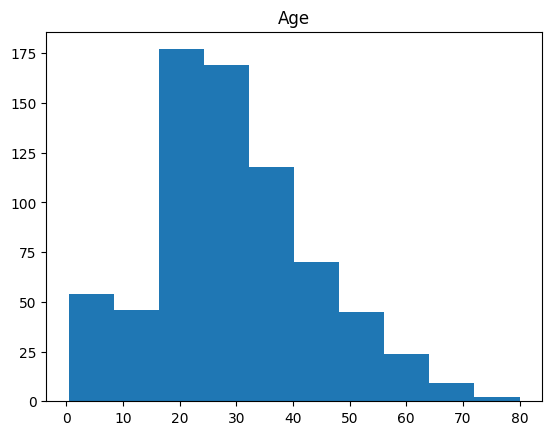

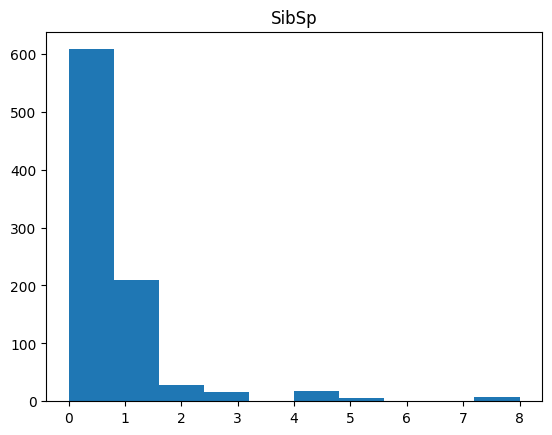

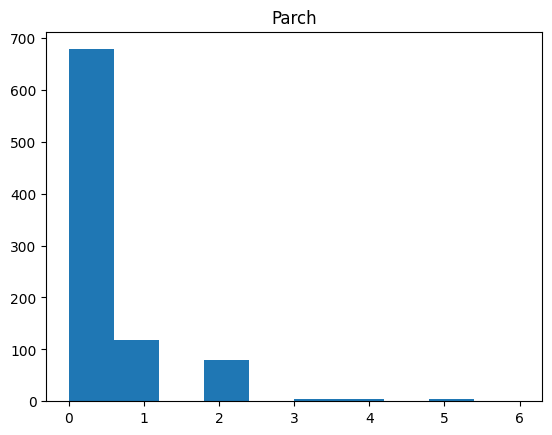

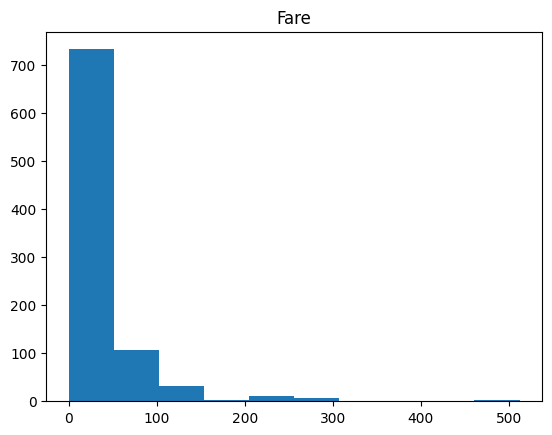

In [8]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

[2025-06-18 14:27:56] 数据型分析完毕


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


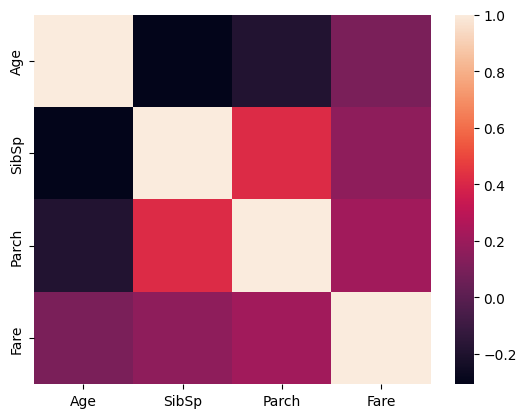

In [9]:
print(df_num.corr())
sns.heatmap(df_num.corr())
logging.info("数据型分析完毕")

In [10]:
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


## 类别型

[2025-06-18 14:27:56] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-06-18 14:27:56] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


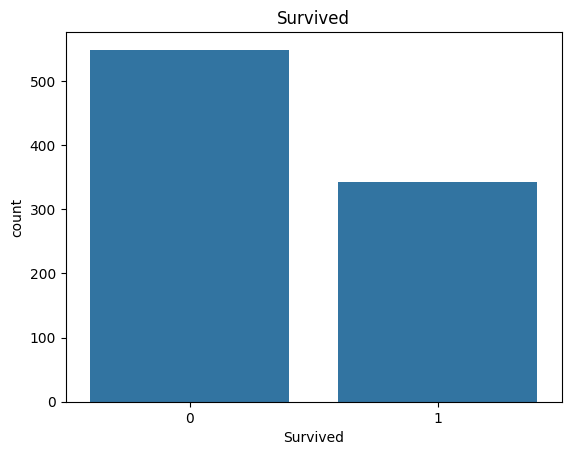

[2025-06-18 14:27:56] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2025-06-18 14:27:56] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


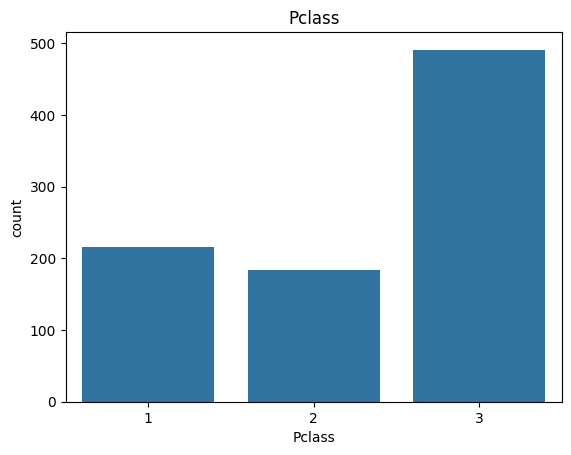

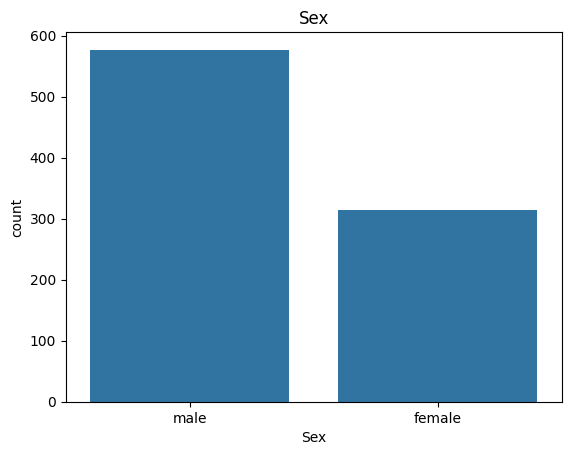

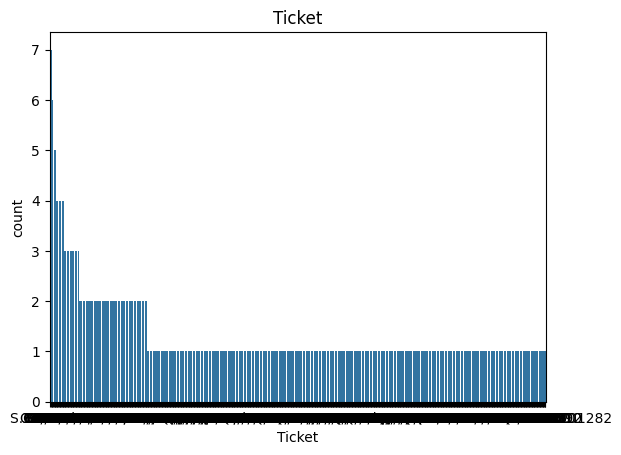

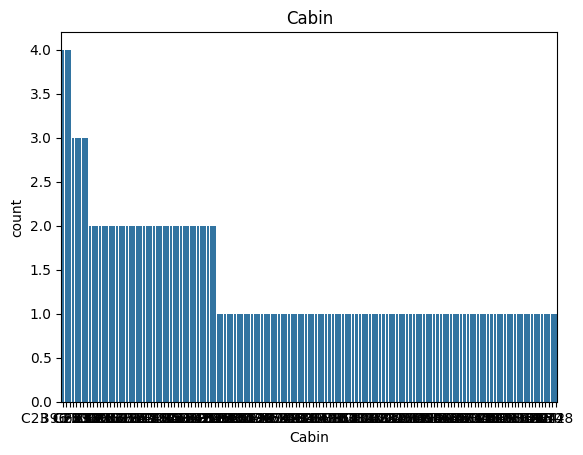

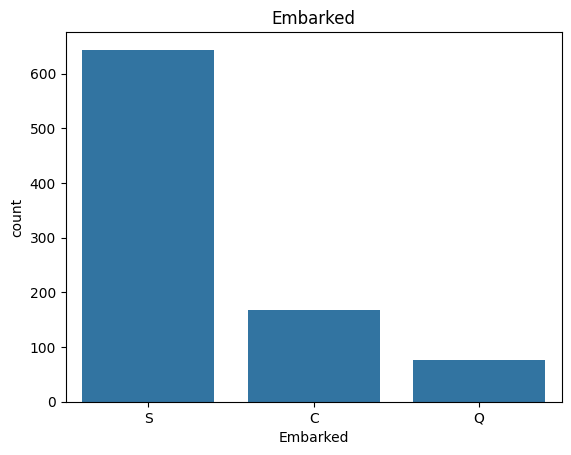

In [11]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
logging.info("类别型分析完毕")

[2025-06-18 14:28:02] 类别型分析完毕


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## 特征工程

### Cabin字母

In [13]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])


In [14]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [15]:
df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [16]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


### ticket

In [17]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


In [18]:
training['numeric_ticket'].value_counts()
pd.crosstab(training['numeric_ticket'], training['Pclass'])

Pclass,1,2,3
numeric_ticket,,,
0,64,57,109
1,152,127,382


In [19]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [20]:
pd.set_option("display.max_rows", None)
training['ticket_letters'].value_counts()


ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
wep            3
sopp           3
ppp            2
sotono2        2
scah           2
swpp           2
sp             1
sca4           1
scow           1
fa             1
sop            1
sc             1
scahbasle      1
as             1
fc             1
casoton        1
Name: count, dtype: int64

In [21]:
pd.pivot_table(training,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


### Name

In [22]:
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [23]:
training['name_title'].value_counts()


name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [24]:
grouped = training.groupby(['Sex','Pclass','name_title'])
grouped['Age'].median()

Sex     Pclass  name_title  
female  1       Dr              49.0
                Lady            48.0
                Miss            30.0
                Mlle            24.0
                Mme             24.0
                Mrs             41.5
                the Countess    33.0
        2       Miss            24.0
                Mrs             32.0
                Ms              28.0
        3       Miss            18.0
                Mrs             31.0
male    1       Capt            70.0
                Col             58.0
                Don             40.0
                Dr              44.0
                Jonkheer        38.0
                Major           48.5
                Master           4.0
                Mr              40.0
                Sir             49.0
        2       Dr              38.5
                Master           1.0
                Mr              31.0
                Rev             46.5
        3       Master           4.0
         

In [25]:
all_data['Age'] = grouped['Age'].transform(lambda x: x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [26]:
all_data['Fare'] = grouped['Fare'].transform(lambda x: x.fillna(x.median()))
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [27]:

all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=['Embarked'],inplace = True)




<Axes: >

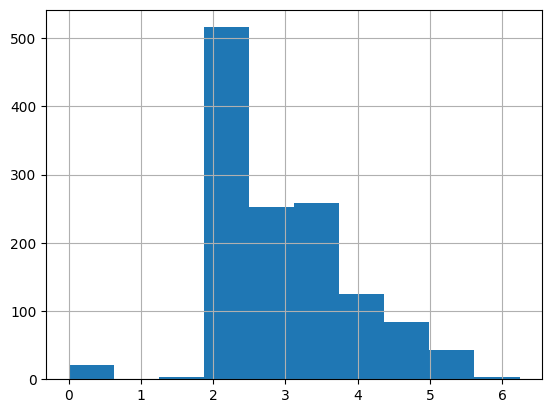

In [28]:

all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

<Axes: >

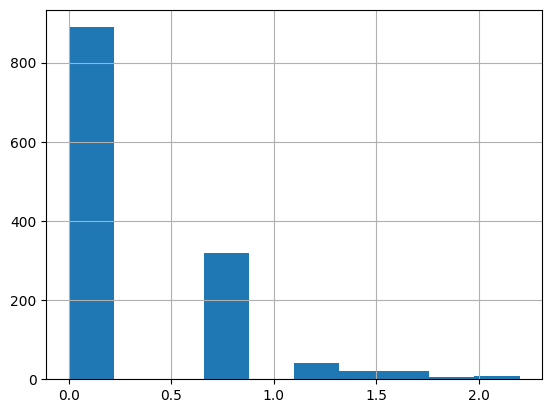

In [29]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

In [30]:

all_data.Pclass = all_data.Pclass.astype(str)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [31]:
 from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
logging. info("数据预处理完毕")


[2025-06-18 14:28:03] 数据预处理完毕


# 数据建模:交叉验证初步预测

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [33]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [34]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.82022472 0.80337079 0.82022472 0.86440678]
0.8268139402018664


In [35]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.82022472 0.80337079 0.82022472 0.86440678]
0.8268139402018664


In [36]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.75280899 0.82022472 0.76404494 0.79096045]
0.7772932139909858


In [37]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76404494 0.75280899 0.82022472 0.76404494 0.79096045]
0.7784168094966037


In [38]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.79213483 0.79213483 0.82022472 0.83615819]
0.8121754586427983


In [39]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.82022472 0.80337079 0.83615819]
0.8121754586427983


In [40]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.79775281 0.83707865 0.75842697 0.83615819]
0.8121754586427983


In [41]:
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv_rf)
print(cv_rf.mean())

[0.83707865 0.79775281 0.83707865 0.75842697 0.83615819]
0.8132990541484162


In [42]:
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv_svc)
print(cv_svc.mean())

[0.83707865 0.82022472 0.8258427  0.80337079 0.85310734]
0.8279248397130706


In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv_xgb = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv_xgb)
print(cv_xgb.mean())

[0.82022472 0.79775281 0.85393258 0.79213483 0.83050847]
0.8189106836792991


In [44]:

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [45]:
cv_voting = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv_voting)
print(cv_voting.mean())

[0.8258427  0.81460674 0.83707865 0.79775281 0.84745763]
0.8245477051990097


In [46]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [47]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [48]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

# 训练+优化

###  常规 LinearRegression无法迭代

In [50]:
logging.info("开始逻辑回归模型的网格搜索调参")

lr = LogisticRegression()
param_grid = {
    'max_iter': [2000],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}
clf_lr = GridSearchCV(lr, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

best_clf_lr = clf_lr.fit(X_train_scaled, y_train)

logging.info(f"最佳参数组合：{best_clf_lr.best_params_}")
logging.info(f"最佳交叉验证得分（准确率）：{best_clf_lr.best_score_:.4f}")

clf_performance(best_clf_lr, 'Logistic Regression')

[2025-06-18 14:43:50] 开始逻辑回归模型的网格搜索调参


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[2025-06-18 14:43:57] 最佳参数组合：{'C': np.float64(11.288378916846883), 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
[2025-06-18 14:43:57] 最佳交叉验证得分（准确率）：0.8246


Logistic Regression
Best Score: 0.8245667491906303
Best Parameters: {'C': np.float64(11.288378916846883), 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


### KNN无法迭代

In [51]:
logging.info("开始 KNN 模型的网格搜索调参")

knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]  # p=1 曼哈顿距离，p=2 欧几里得距离
}

clf_knn = GridSearchCV(knn, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

best_clf_knn = clf_knn.fit(X_train_scaled, y_train)

logging.info(f"KNN 最佳参数组合：{best_clf_knn.best_params_}")
logging.info(f"KNN 最佳交叉验证得分（准确率）：{best_clf_knn.best_score_:.4f}")

clf_performance(best_clf_knn, 'KNN')

[2025-06-18 14:43:57] 开始 KNN 模型的网格搜索调参


Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\Anaconda\envs\mypandas\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
[2025-06-18 14:43:58] KNN 最佳参数组合：{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
[2025-06-18 14:43:58] KNN 最佳交叉验证得分（准确率）：0.8200


KNN
Best Score: 0.820034279184917
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


### SVC无法迭代

In [52]:
logging.info(" 开始 SVC 模型的网格搜索调参")

svc = SVC(probability=True)

param_grid = [
    {'kernel': ['rbf'], 'gamma': [.1, .5, 1, 2, 5, 10], 'C': [.1, 1, 10, 100, 1000]},
    {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
    {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [.1, 1, 10, 100, 1000]}
]

clf_svc = GridSearchCV(svc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)


best_clf_svc = clf_svc.fit(X_train_scaled, y_train)

logging.info(f"SVC 最佳参数组合：{best_clf_svc.best_params_}")
logging.info(f"SVC 最佳交叉验证得分（准确率）：{best_clf_svc.best_score_:.4f}")

clf_performance(best_clf_svc, 'SVC')

[2025-06-18 14:43:58]  开始 SVC 模型的网格搜索调参


Fitting 5 folds for each of 55 candidates, totalling 275 fits


D:\Anaconda\envs\mypandas\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
[2025-06-18 14:46:40] SVC 最佳参数组合：{'C': 1, 'degree': 2, 'kernel': 'poly'}
[2025-06-18 14:46:40] SVC 最佳交叉验证得分（准确率）：0.8313


SVC
Best Score: 0.8313146702215451
Best Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}


In [53]:
y_hat_svc = best_clf_svc.best_estimator_.predict(X_test_scaled).astype(int)

svc_submission = {
    'PassengerId': test.PassengerId,
    'Survived': y_hat_svc
}
submission_svc = pd.DataFrame(data=svc_submission)
submission_svc.to_csv('svc_submission1.csv', index=False)

logging.info(" 已保存 SVC 模型的预测结果到 svc_submission.csv")


[2025-06-18 14:46:40]  已保存 SVC 模型的预测结果到 svc_submission.csv


### 随机森林非迭代

In [54]:
logging.info(" 开始 Random Forest 模型的网格搜索调参")


rf = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [400, 450, 500, 550],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True],
    'max_depth': [15, 20, 25],
    'max_features': ['auto', 'sqrt', 10],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3]
}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

best_clf_rf = clf_rf.fit(X_train_scaled, y_train)


logging.info(f"最佳参数组合：{best_clf_rf.best_params_}")
logging.info(f"最佳交叉验证准确率：{best_clf_rf.best_score_:.4f}")

clf_performance(best_clf_rf, 'Random Forest')

[2025-06-18 14:46:40]  开始 Random Forest 模型的网格搜索调参


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


D:\Anaconda\envs\mypandas\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
211 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\envs\mypandas\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\envs\mypandas\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\envs\mypandas\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\envs\mypandas\lib\site-

Random Forest
Best Score: 0.8369136037580143
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


<Axes: >

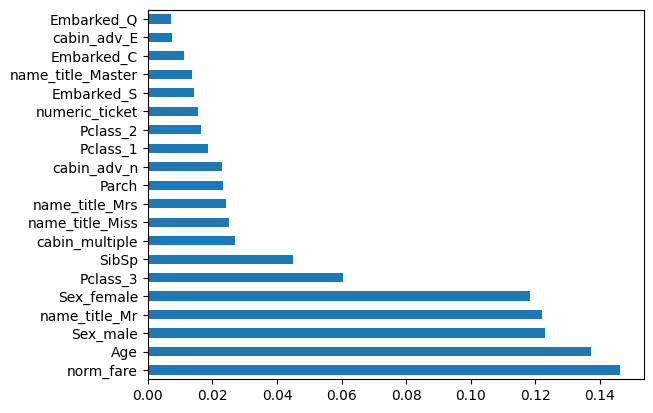

In [55]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [56]:
# logging.info("开始 XGBoost 模型的网格搜索调参")


# xgb = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# param_grid = {
#     'n_estimators': [450, 500, 550],
#     'colsample_bytree': [0.75, 0.8, 0.85],
#     'max_depth': [None],
#     'reg_alpha': [1],
#     'reg_lambda': [2, 5, 10],
#     'subsample': [0.55, 0.6, 0.65],
#     'learning_rate': [0.5],
#     'gamma': [0.5, 1, 2],
#     'min_child_weight': [0.01],
#     'sampling_method': ['uniform']
# }

# clf_xgb = GridSearchCV(xgb, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)

# logging.info(f" 最佳参数组合：{best_clf_xgb.best_params_}")
# logging.info(f" 最佳交叉验证准确率：{best_clf_xgb.best_score_:.4f}")

# clf_performance(best_clf_xgb, 'XGB')


In [57]:
import xgboost as xgb  # 保留模块名为 xgb
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, log_loss

logging.basicConfig(filename='train_log.txt', level=logging.INFO)
logging.info("开始记录xgb每轮的 LogLoss、F1、Accuracy、Precision、Recall")

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.5,
    'colsample_bytree': 0.75,
    'gamma': 0.5,
    'max_depth': 6,
    'reg_alpha': 1,
    'reg_lambda': 10,
    'subsample': 0.65,
    'min_child_weight': 0.01,
    'seed': 1
}

num_round = 100
bst = xgb.train(params, dtrain, num_boost_round=num_round, evals=[(dtrain, 'train')], verbose_eval=False)

f1_list, acc_list, prec_list, recall_list, logloss_list = [], [], [], [], []

for i in range(1, num_round + 1):
    y_pred_prob = bst.predict(dtrain, iteration_range=(0, i))
    y_pred = (y_pred_prob >= 0.5).astype(int)

    f1 = f1_score(y_train, y_pred)
    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    loss = log_loss(y_train, y_pred_prob)

    f1_list.append(f1)
    acc_list.append(acc)
    prec_list.append(prec)
    recall_list.append(recall)
    logloss_list.append(loss)

    logging.info(f"第 {i:3d} 轮 - LogLoss: {loss:.4f} | F1: {f1:.4f} | Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {recall:.4f}")

print(f"最终第 {num_round} 轮：")
print(f"LogLoss:   {logloss_list[-1]:.4f}")
print(f"F1:        {f1_list[-1]:.4f}")
print(f"Accuracy:  {acc_list[-1]:.4f}")
print(f"Precision: {prec_list[-1]:.4f}")
print(f"Recall:    {recall_list[-1]:.4f}")

[2025-06-18 14:47:55] 开始记录xgb每轮的 LogLoss、F1、Accuracy、Precision、Recall
[2025-06-18 14:47:55] 第   1 轮 - LogLoss: 0.5240 | F1: 0.6385 | Accuracy: 0.7885 | Precision: 0.9222 | Recall: 0.4882
[2025-06-18 14:47:55] 第   2 轮 - LogLoss: 0.4575 | F1: 0.7826 | Accuracy: 0.8425 | Precision: 0.8289 | Recall: 0.7412
[2025-06-18 14:47:55] 第   3 轮 - LogLoss: 0.4272 | F1: 0.7760 | Accuracy: 0.8448 | Precision: 0.8659 | Recall: 0.7029
[2025-06-18 14:47:55] 第   4 轮 - LogLoss: 0.4079 | F1: 0.7840 | Accuracy: 0.8425 | Precision: 0.8247 | Recall: 0.7471
[2025-06-18 14:47:55] 第   5 轮 - LogLoss: 0.3991 | F1: 0.7988 | Accuracy: 0.8515 | Precision: 0.8291 | Recall: 0.7706
[2025-06-18 14:47:55] 第   6 轮 - LogLoss: 0.3883 | F1: 0.7988 | Accuracy: 0.8515 | Precision: 0.8291 | Recall: 0.7706
[2025-06-18 14:47:55] 第   7 轮 - LogLoss: 0.3817 | F1: 0.8000 | Accuracy: 0.8526 | Precision: 0.8317 | Recall: 0.7706
[2025-06-18 14:47:55] 第   8 轮 - LogLoss: 0.3747 | F1: 0.8030 | Accuracy: 0.8526 | Precision: 0.8215 | Recall: 0

最终第 100 轮：
LogLoss:   0.2805
F1:        0.8528
Accuracy:  0.8920
Precision: 0.8910
Recall:    0.8176


In [58]:
dtest = xgb.DMatrix(X_test_scaled)

y_hat_xgb = bst.predict(dtest)
y_hat_xgb_label = (y_hat_xgb >= 0.5).astype(int)  # 将概率转为0/1标签

xgb_submission = {
    'PassengerId': test.PassengerId,
    'Survived': y_hat_xgb_label
}
submission_xgb = pd.DataFrame(data=xgb_submission)

submission_xgb.to_csv('xgb_submission_final.csv', index=False)
